In [1]:
# to run the code on google colab, uncomment the following lines
!git clone https://github.com/reddybhargava/data_analytics_project-1.git
%cd /content/data_analytics_project-1

Cloning into 'data_analytics_project-1'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 111 (delta 42), reused 93 (delta 28), pack-reused 0
Receiving objects: 100% (111/111), 14.52 MiB | 5.38 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/data_analytics_project-1


## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from functions import xgboost_classifier
from functions import print_confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Importing the modified dataset

In [0]:
path = '/content/data_analytics_project-1/dataset_modified/'
train_values = pd.read_csv(path +'train_values.csv')
train_labels = pd.read_csv(path +'train_labels.csv')
test_values = pd.read_csv(path +'test_values.csv')

# Implementing XGBoost Models


In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels['damage_grade'], test_size=0.3, random_state=10) # 70% training and 30% test
X_train = X_train.drop(columns = 'building_id')
X_test = X_test.drop (columns = 'building_id')

## XGBoost

In [0]:
"""
    THE FOLLOWING CODE IS COMMENTED OUT AS IT TAKES A VERY LONG TO EXECUTE ....
    The following code does a Random Search on the hyperparameters of the XGBoost Model to optimise the model
"""

# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

# params={
#  "learning_rate"    : [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
#  "max_depth"        : [ 5, 6, 8, 9, 10, 12],
#  "min_child_weight" : [ 0, 1, 2, 3.5, 5 ],
#  "gamma"            : [ 0.0, 0.1, 0.25, 0.3, 0.4],
#  "colsample_bytree" : [ 0.7, 0.75, 0.8, 0.85],
#  "subsample"        : [ 0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
#  "n_estimators"     : [ 50, 80, 100]
    
# }

# classifier = XGBClassifier(objective = 'multi:softmax')

# random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)
# random_search.fit(train_values,train_labels)
# print(random_search.best_params_)

# # The above code returns the following output of parameters which can further be used for the XGBoost Model

# # {
# #  'colsample_bytree': 0.8,
# #  'gamma': 0.1,
# #  'learning_rate': 0.2,      # 'eta' in the model below
# #  'max_depth': 10,
# #  'min_child_weight': 5,
# #  'n_estimators': 100,
# #  'subsample': 0.8
# # }


Accuracy of XGBoostClassifier: 0.7444775584860772


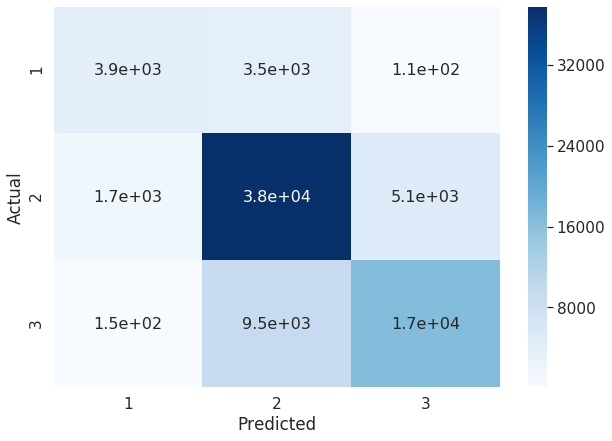

In [6]:
# XGBoost Model
model, y_pred = xgboost_classifier(X_train,y_train,X_test,y_test)
print_confusion_matrix(y_test, y_pred)

## Undersampling the majority class

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels['damage_grade'], test_size=0.3, random_state=10) # 70% training and 30% test
X_train = X_train.drop(columns = 'building_id')
X_test  = X_test.drop (columns = 'building_id')

X = pd.concat([X_train, y_train], axis=1)

damage1 = X[X.damage_grade == 1]
damage2 = X[X.damage_grade == 2]
damage3 = X[X.damage_grade == 3]

undersampled = resample(damage2,
                        replace = False,
                        n_samples = len(damage3),
                        random_state = 25)

X = pd.concat([damage1, undersampled, damage3])

X_train = X.drop(['damage_grade'], axis=1)
y_train = X.damage_grade

In [0]:
# XGBoost Model

# xgboost classifier accepts classes only in the range [0, num_class)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# transforming data into DMatrix for it to be usable by XGBoost
D_train = xgb.DMatrix(X_train, label = y_train_xgb)
D_test = xgb.DMatrix(X_test, label = y_test_xgb)

param = {
    'eta': 0.2,
    'subsample': 0.7, 
    'min_child_weight': 5, 
    'max_depth': 12, 
    'gamma': 0.4, 
    'colsample_bytree': 0.7,
    'objective': 'multi:softmax',
    'num_class': 3
}

steps = 100

# training the model
clf = xgb.train(param, D_train, steps)

# predicting damage_grade for the test values
y_pred = clf.predict(D_test)
y_pred += 1

# XGBoost Model Accuracy
print("Accuracy of XGBoost: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

## Oversampling the minority classes

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels['damage_grade'], test_size=0.3, random_state=10) # 70% training and 30% test
X_train = X_train.drop(columns = 'building_id')
X_test  = X_test.drop (columns = 'building_id')

X = pd.concat([X_train, y_train], axis=1)

damage1 = X[X.damage_grade == 1]
damage2 = X[X.damage_grade == 2]
damage3 = X[X.damage_grade == 3]

oversampled1 = resample(damage1,
                        replace = True,
                        n_samples = len(damage2),
                        random_state = 25)

oversampled3 = resample(damage3,
                        replace = True,
                        n_samples = len(damage2),
                        random_state = 25)

X = pd.concat([oversampled1, damage2, oversampled3])

X_train = X.drop(['damage_grade'], axis=1)
y_train = X.damage_grade

In [0]:
# XGBoost Model

# xgboost classifier accepts classes only in the range [0, num_class)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# transforming data into DMatrix for it to be usable by XGBoost
D_train = xgb.DMatrix(X_train, label = y_train_xgb)
D_test = xgb.DMatrix(X_test, label = y_test_xgb)

param = {
    'eta': 0.2,
    'subsample': 0.7, 
    'min_child_weight': 5, 
    'max_depth': 12, 
    'gamma': 0.4, 
    'colsample_bytree': 0.7,
    'objective': 'multi:softmax',
    'num_class': 3
}

steps = 100

# training the model
clf = xgb.train(param, D_train, steps)

# predicting damage_grade for the test values
y_pred = clf.predict(D_test)
y_pred += 1

# XGBoost Model Accuracy
print("Accuracy of XGBoost: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

## SMOTE

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels['damage_grade'], test_size=0.3, random_state=10) # 70% training and 30% test
X_train = X_train.drop(columns = 'building_id')
X_test  = X_test.drop (columns = 'building_id')

smt = SMOTE()
X_train1, y_train1 = smt.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train1, columns = X_train.columns)
y_train = pd.Series(y_train1)

In [0]:
# XGBoost Model

# xgboost classifier accepts classes only in the range [0, num_class)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# transforming data into DMatrix for it to be usable by XGBoost
D_train = xgb.DMatrix(X_train, label = y_train_xgb)
D_test = xgb.DMatrix(X_test, label = y_test_xgb)

param = {
    'eta': 0.2,
    'subsample': 0.7, 
    'min_child_weight': 5, 
    'max_depth': 12, 
    'gamma': 0.4, 
    'colsample_bytree': 0.7,
    'objective': 'multi:softmax',
    'num_class': 3
}

steps = 100

# training the model
clf = xgb.train(param, D_train, steps)

# predicting damage_grade for the test values
y_pred = clf.predict(D_test)
y_pred += 1

# XGBoost Model Accuracy
print("Accuracy of XGBoost: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy of Random Forest: ",clf.score(X_test, y_test))

## ADASYN

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels['damage_grade'], test_size=0.3, random_state=10) # 70% training and 30% test
X_train = X_train.drop(columns = 'building_id')
X_test  = X_test.drop (columns = 'building_id')

asyn = ADASYN()
X_train1, y_train1 = asyn.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train1, columns = X_train.columns)
y_train = pd.Series(y_train1)

In [0]:
# XGBoost Model

# xgboost classifier accepts classes only in the range [0, num_class)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# transforming data into DMatrix for it to be usable by XGBoost
D_train = xgb.DMatrix(X_train, label = y_train_xgb)
D_test = xgb.DMatrix(X_test, label = y_test_xgb)

param = {
    'eta': 0.2,
    'subsample': 0.7, 
    'min_child_weight': 5, 
    'max_depth': 12, 
    'gamma': 0.4, 
    'colsample_bytree': 0.7,
    'objective': 'multi:softmax',
    'num_class': 3
}

steps = 100

# training the model
clf = xgb.train(param, D_train, steps)

# predicting damage_grade for the test values
y_pred = clf.predict(D_test)
y_pred += 1

# XGBoost Model Accuracy
print("Accuracy of XGBoost: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=300)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy of Random Forest: ",clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))